In [51]:
from os import listdir
import cv2
import numpy as np
from skimage.util import random_noise
from imutils import grab_contours
import copy
import matplotlib.pyplot as plt

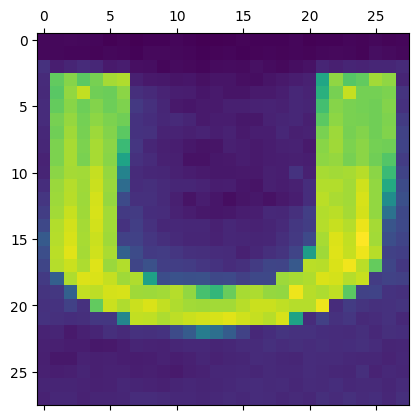

In [61]:
# Load image
image = cv2.imread("U_01.jpg")
resized = cv2.resize(image, (28,28))
# convert picture to gray scale
img_gray = cv2.cvtColor(resized, cv2.COLOR_BGR2GRAY)
# _,img = cv2.threshold(img_gray,127,255,cv2.THRESH_BINARY)
x_flattend = img_gray.reshape(1, 28*28)
plt.matshow(img_gray)
x_flattend = np.squeeze(x_flattend)
x_flattend = x_flattend/255
x_flattend

In [53]:
import numpy as np
import math

OUTPUT_NEURONS = 20
INPUT_NEURONS = 28 * 28
HIDDEN_NEURONS = 16

def Weight_Initialization():
    # Initializing of the Weights. Random float number between -0.5 to 0.5 for weights.
    np.random.seed(1)
    inputs= np.random.uniform(-0.5, 0.5, size=( INPUT_NEURONS))
    wji= np.random.uniform(-0.5, 0.5, size=(HIDDEN_NEURONS, INPUT_NEURONS))
    wkj = np.random.uniform(-0.5, 0.5, size=(OUTPUT_NEURONS, HIDDEN_NEURONS))
    bias_j = np.random.uniform(0, 1, size=(HIDDEN_NEURONS))
    bias_k = np.random.uniform(0, 1, size=(OUTPUT_NEURONS))
    targets = np.random.uniform(0, 1, size=(OUTPUT_NEURONS))
    return inputs, wji,wkj,bias_j,bias_k,targets
# def Read_Files():
#     # Reading of Segmented Training Files, and Target Files.


def Forward_Input_Hidden(inputs,wji, bias_j):
    # Forward Propagation from Input -> Hidden Layer.
    # Obtain the results at each neuron in the hidden layer.
    # Calculate 𝑁𝑒𝑡𝑗and 𝑂𝑢𝑡𝑗

    Netj = np.dot(inputs,wji.T) 
    print("Netj :")
    print(Netj)
    Outj = 1/(1 + math.e**-(Netj + np.transpose(bias_j)))
    print("Outj :")
    print(Outj)
    return Netj,Outj

def Forward_Hidden_Output(Netj,wkj, bias_k):
    # Forward Propagation from Input -> Hidden Layer.
    # Obtain the results at each neuron in the hidden layer.
    # Calculate 𝑁𝑒𝑡kand 𝑂𝑢𝑡k
    Netk = np.dot(Netj,wkj.T) 
    print("Netk :")
    print(Netk)
    Outk = 1/(1 + math.e**-(Netk + np.transpose(bias_k)))
    print("Outk :")
    print(Outk)
    return Netk, Outk


In [54]:
def Check_for_End(Outk, targets, user_set):
    # Check whether the total error is less than the error set by the user or the number of iterations is reached.
    # returns true or false
    def Error_Correction(outs, targets):
        total_error= np.sum(((outs - targets)**2)/2)
        return total_error
    if Error_Correction(Outk, targets)< user_set:
        return True

    else: 
        return False
        

In [55]:
def Weight_Bias_Correction_Output(Outk, targets, Outj):
    # Correction of Weights and Bias between Hidden and Output Layer.
    # Calculate 𝑑𝑤𝑘𝑘𝑗 and 𝑑𝑏𝑘𝑘𝑗
    dwkkj =  np.empty((0, len(Outk)))
    for i in range(len(Outj)):
        temp =(Outk - targets) * Outk*(1 - Outk) * Outj[i]
        dwkkj = np.vstack([dwkkj,temp])
    dbkkj = (Outk - targets) * Outk*(1 - Outk) 
    dwkkj = dwkkj.T
    # print(dwkkj)
    return dwkkj,dbkkj

In [56]:
def Weight_Bias_Correction_Hidden(outj,outk,inputs,target,wkj):
    # Correction of Weights and Bias between Input and Hidden Layer.
    # Calculate 𝑑𝑤𝑗𝑗𝑖 and 𝑑𝑏𝑗𝑗𝑖
    skl = (outk - target) * outk*(1-outk)
    dwjji= np.multiply.outer(outj *(1 - outj) * np.dot(skl,wkj),inputs)
    dbjii = outj *(1 - outj) * np.dot(skl,wkj)

    return dwjji, dbjii

In [57]:
def Weight_Bias_Update(wkj,dwkkj, bias_k, dbkkj, wji, dwjji,bias_j,dbjii ):
    # Saving_Weights_Bias() implemented inside
    # Update Weights and Bias.
    # Calculate 𝑤𝑘𝑘𝑗+ and 𝑏𝑘𝑘𝑗+
    n = 0.5
    wkjj = wkj - n*dwkkj
    bkkj = bias_k - n*dbkkj
    print("wk+")
    print(wkjj)
    print("bias_k+")
    print(bkkj)

    # Calculate 𝑤𝑗𝑗𝑖+ and 𝑏𝑗𝑗𝑖+
    wjji = wji - n *dwjji
    bjji = bias_j - n* dbjii
    print("wj+")
    print(wjji)
    print("bias_j+")
    print(bjji)

In [58]:
# def Saving_Weights_Bias():
#     # Save 𝑤𝑘𝑘𝑗 and 𝑏𝑘𝑘𝑗
#     # Save 𝑤𝑗𝑗𝑖 and 𝑏𝑗𝑗𝑖


In [59]:
inputs, wji,wkj,bias_j,bias_k,target = Weight_Initialization()
# inputs= np.array([0.2,0.5])
# wji= np.array([[0.1,0.2],[0.3,0.4]])
# wkj= np.array([[0.5,0.6],[0.7,0.8]])
# bias_j = np.array([0.2,0.2])
# bias_k = np.array([0.4,0.4])
# target = np.array([0.2,0.8])
# inputs= np.array([0.5,0.8])
# wji= np.array([[-0.8,0.2],[-0.5,-0.2],[0.4,0.4]])
# wkj= np.array([[-0.3,0.15,0.4],[0.4,-0.5,0.1]])
# bias_j = np.array([0.4,0.2,0.1])
# bias_k = np.array([0.3,0.15])
# target = np.array([0.7,0.4])
netj,outj = Forward_Input_Hidden(x_flattend, wji, bias_j)
netk,outk = Forward_Hidden_Output(outj, wkj, bias_k)

dwkkj,dbkkj = Weight_Bias_Correction_Output(outk,target, outj)

dwjji, dbjii = Weight_Bias_Correction_Hidden(outj,outk,x_flattend,target,wkj)

Weight_Bias_Update(wkj,dwkkj, bias_k, dbkkj, wji, dwjji,bias_j,dbjii)

Error_Correction(outk, target)

Netj :
[ -724.35837562   498.81474615 -1528.20112257  -212.44117126
 -2292.57537329   845.69289222  1871.663361    -845.64999216
 -1098.78621942 -1384.46407524   591.71757825  1331.37986951
  -186.49686752   459.35448876   924.62294155  1039.69237072]
Outj :
[0.00000000e+00 1.00000000e+00 0.00000000e+00 1.30925901e-92
 0.00000000e+00 1.00000000e+00 1.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 1.00000000e+00 1.00000000e+00
 1.45383693e-81 1.00000000e+00 1.00000000e+00 1.00000000e+00]
Netk :
[ 0.29346409  1.03812907 -0.61351301 -0.69251549  0.86877155 -1.11893651
 -1.72708471 -0.59137996  1.27581655  1.99099122  0.34940673  1.11431663
  0.52845287  1.23269046  0.42297864 -0.6239377   0.44244167  0.3541615
  0.52554855  0.52538661]
Outk :
[0.69594084 0.78275891 0.47904799 0.46831165 0.73643064 0.31128527
 0.2055821  0.49511881 0.84109309 0.94695038 0.78161035 0.77849427
 0.74046439 0.82956245 0.61543115 0.53871559 0.75446905 0.60693622
 0.70549316 0.76952344]
wk+
[[-1.8525

C:\Users\jiash\AppData\Local\Temp\ipykernel_9400\3414519893.py:30: RuntimeWarning: overflow encountered in power
  Outj = 1/(1 + math.e**-(Netj + np.transpose(bias_j)))


1.0392602430769264